# Linear Regression notebook 1


### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Check out the Data

In [2]:
toyota_price = pd.read_csv('data/ToyotaCorolla.csv')

In [3]:
toyota_price.head()

Price  Age     KM FuelType  HP  MetColor  Automatic    CC  Doors  Weight
0  13500   23  46986   Diesel  90         1          0  2000      3    1165
1  13750   23  72937   Diesel  90         1          0  2000      3    1165
2  13950   24  41711   Diesel  90         1          0  2000      3    1165
3  14950   26  48000   Diesel  90         0          0  2000      3    1165
4  13750   30  38500   Diesel  90         0          0  2000      3    1170

In [4]:
toyota_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 10 columns):
Price        1436 non-null int64
Age          1436 non-null int64
KM           1436 non-null int64
FuelType     1436 non-null object
HP           1436 non-null int64
MetColor     1436 non-null int64
Automatic    1436 non-null int64
CC           1436 non-null int64
Doors        1436 non-null int64
Weight       1436 non-null int64
dtypes: int64(9), object(1)
memory usage: 112.3+ KB


In [5]:
toyota_price.describe()

Price          Age             KM           HP     MetColor  \
count   1436.000000  1436.000000    1436.000000  1436.000000  1436.000000   
mean   10730.824513    55.947075   68533.259749   101.502089     0.674791   
std     3626.964585    18.599988   37506.448872    14.981080     0.468616   
min     4350.000000     1.000000       1.000000    69.000000     0.000000   
25%     8450.000000    44.000000   43000.000000    90.000000     0.000000   
50%     9900.000000    61.000000   63389.500000   110.000000     1.000000   
75%    11950.000000    70.000000   87020.750000   110.000000     1.000000   
max    32500.000000    80.000000  243000.000000   192.000000     1.000000   

         Automatic           CC        Doors      Weight  
count  1436.000000  1436.000000  1436.000000  1436.00000  
mean      0.055710  1566.827994     4.033426  1072.45961  
std       0.229441   187.182436     0.952677    52.64112  
min       0.000000  1300.000000     2.000000  1000.00000  
25%       0.000000  1400.000000     3.000000  1040.00000  
50%       0.000000  1600.000000     4.000000  1070.00000  
75%       0.000000  1600.000000     5.000000  1085.00000  
max       1.000000  2000.000000     5.000000  1615.00000

In [6]:
toyota_price.columns

Index(['Price', 'Age', 'KM', 'FuelType', 'HP', 'MetColor', 'Automatic', 'CC',
       'Doors', 'Weight'],
      dtype='object')

# EDA: (Visual) Exploratory Data Analysis

Let's create some simple plots to have an insight in the data.

In [7]:
sns.pairplot(toyota_price)

In [8]:
sns.distplot(toyota_price['Price'])

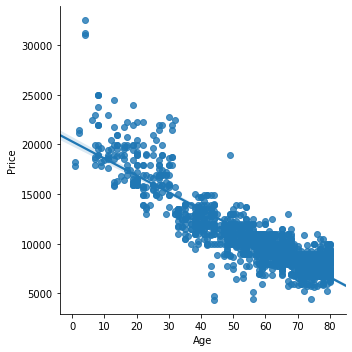

In [9]:
sns.lmplot(x='Age',y='Price',data=toyota_price)

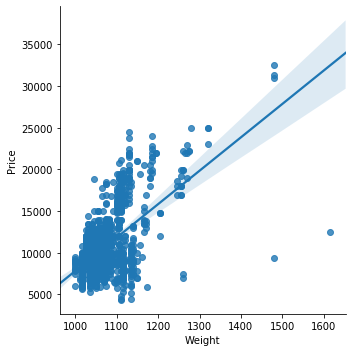

In [10]:
sns.lmplot(x='Weight',y='Price',data=toyota_price)

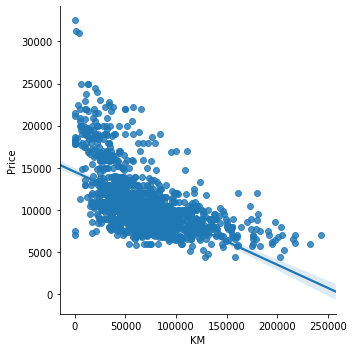

In [11]:
sns.lmplot(x='KM',y='Price',data=toyota_price)

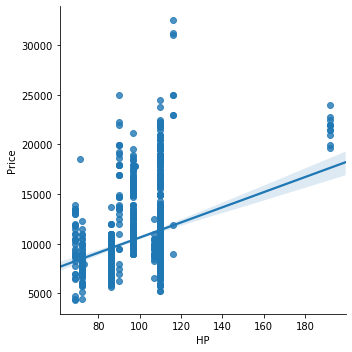

In [12]:
sns.lmplot(x='HP',y='Price',data=toyota_price)

In [13]:
sns.lmplot(x='HP',y='Price',data=toyota_price)

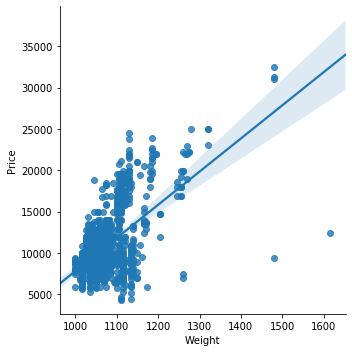

In [14]:
sns.lmplot(x='Weight',y='Price',data=toyota_price)

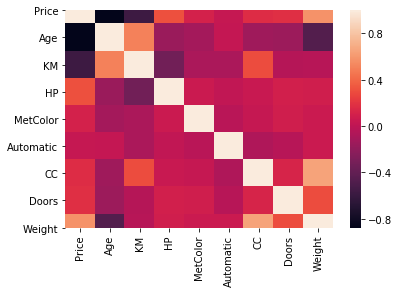

In [15]:
sns.heatmap(toyota_price.corr())

## Training a Linear Regression Model

It's time to start training our regression model.


### X and y arrays

In [16]:
toyota_price.columns

Index(['Price', 'Age', 'KM', 'FuelType', 'HP', 'MetColor', 'Automatic', 'CC',
       'Doors', 'Weight'],
      dtype='object')

In [17]:
X = toyota_price[['Age','KM','HP','CC','Weight']]
y = toyota_price['Price']

## Train Test Split

Now let's split the data into a training set and a testing set. We will train out model on the training set and then use the test set to evaluate the model.

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

## Creating and Training the Model

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
lm = LinearRegression()

In [22]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Model Evaluation

Let's evaluate the model by checking out it's coefficients and how we can interpret them.

In [23]:
# print the intercept
print(lm.intercept_)

-1719.0618160402955


In [24]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

Coefficient
Age     -126.571003
KM        -0.014952
HP        33.689228
CC        -1.095692
Weight    17.576006

Interpreting the coefficients:

- Holding all other features fixed, a 1 unit increase in **Age** is associated with an **decrease of \$126.57**.
- Holding all other features fixed, a 1 unit increase in **KM** is associated with an **decrease of \$0.014**.
- Holding all other features fixed, a 1 unit increase in **HP** is associated with an **increase of \$33.69**.
- Holding all other features fixed, a 1 unit increase in **CC** is associated with an **decrease of \$1.09**
- Holding all other features fixed, a 1 unit increase in **Weight** is associated with an **increase of \$17.57**

## Predictions from our Model

Let's grab predictions off our test set and see how well it did!

In [25]:
predictions = lm.predict(X_test)

In [26]:
plt.scatter(y_test,predictions)

**Residual Histogram**

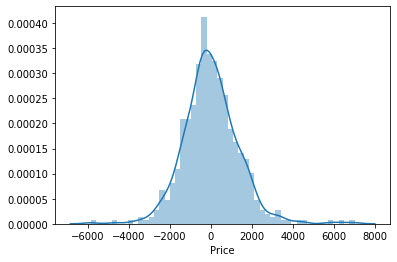

In [27]:
sns.distplot((y_test-predictions),bins=50);

## Regression Evaluation Metrics


Here are three common evaluation metrics for regression problems:

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are **loss functions**, because we want to minimize them.

In [28]:
from sklearn import metrics

In [29]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 999.4809130588733
MSE: 1816547.3867659343
RMSE: 1347.7935252723


In [30]:
from sklearn.preprocessing import PolynomialFeatures
polyFeat = PolynomialFeatures(degree=2)
polyFeat = polyFeat.fit(X)
X_poly = polyFeat.transform(X)

In [31]:
from sklearn.model_selection import train_test_split
X_poly_train, X_poly_test, y_poly_train, y_poly_test = train_test_split(pd.DataFrame(X_poly), y, test_size=0.4, random_state=101)

In [32]:
from sklearn.linear_model import LinearRegression
lm_poly = LinearRegression()
lm_poly.fit(X_poly_train,y_poly_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [33]:
print(lm_poly.intercept_)

-110011.20741848875


In [34]:
lm_poly.coef_

array([ 0.00000000e+00,  6.74840534e+02, -9.55334381e-02, -1.43219499e+01,
        1.20563714e+01,  1.65323259e+02, -2.50515621e-02,  4.83908690e-04,
       -1.04050014e+00,  2.18315781e-04, -6.58053147e-01, -1.09350767e-07,
       -8.35393855e-05,  1.71788685e-05,  4.73995932e-05, -1.92385071e-01,
        6.94312092e-03,  1.16034665e-01,  4.67967575e-04, -1.51061175e-02,
       -4.65144314e-02])

In [35]:
coeff_df_poly = pd.DataFrame(lm_poly.coef_, pd.DataFrame(X_poly).columns,columns=['Coefficient'])
coeff_df_poly

Coefficient
0   0.000000e+00
1   6.748405e+02
2  -9.553344e-02
3  -1.432195e+01
4   1.205637e+01
5   1.653233e+02
6  -2.505156e-02
7   4.839087e-04
8  -1.040500e+00
9   2.183158e-04
10 -6.580531e-01
11 -1.093508e-07
12 -8.353939e-05
13  1.717887e-05
14  4.739959e-05
15 -1.923851e-01
16  6.943121e-03
17  1.160347e-01
18  4.679676e-04
19 -1.510612e-02
20 -4.651443e-02

In [36]:
lm_poly

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [38]:
poly_predictions = lm_poly.predict(X_poly_test)

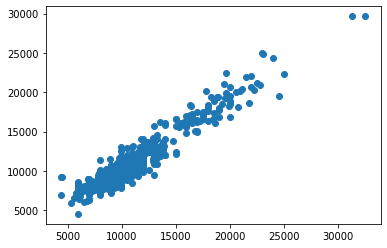

In [39]:
plt.scatter(y_poly_test,poly_predictions)

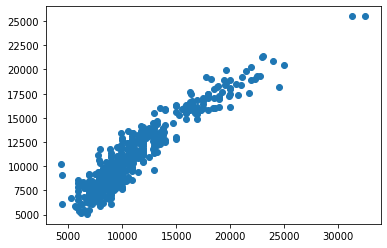

In [40]:
plt.scatter(y_test,predictions)

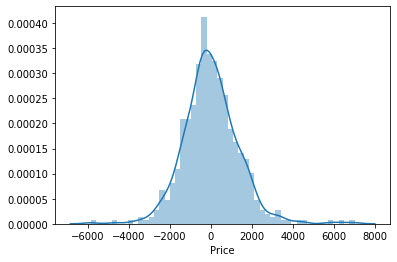

In [41]:
sns.distplot((y_test-predictions),bins=50);

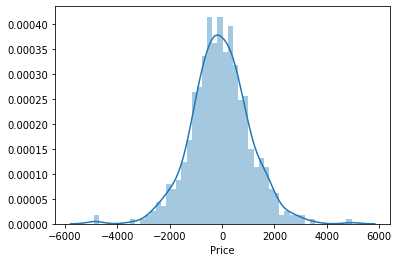

In [42]:
sns.distplot((y_poly_test-poly_predictions),bins=50);

In [43]:
print('MAE:', metrics.mean_absolute_error(y_poly_test, poly_predictions))
print('MSE:', metrics.mean_squared_error(y_poly_test, poly_predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_poly_test, poly_predictions)))

MAE: 863.42241255489
MSE: 1276543.8854867967
RMSE: 1129.8424162186498


In [44]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 999.4809130588733
MSE: 1816547.3867659343
RMSE: 1347.7935252723


# Pickle Export and Test the pkl model

In [75]:
# Save model as Pickle file
import pickle
pickle.dump(lm, open('CorrolaPrice.pkl','wb'))

In [76]:
# Age - KM - HP - CC - Weight
test_prediction_value=lm.predict(pd.DataFrame([[10,25000,110,1600,1200]]))
print(test_prediction_value)

[19685.33110018]


In [78]:
# Test with pickle model
model_pkl = pickle.load(open('CorrolaPrice.pkl','rb'))
print(model_pkl.predict(pd.DataFrame([[10,25000,110,1600,1200]])))

[19685.33110018]
